# 🫀 Model Karşılaştırması - Kalp Hastalığı Tahmini

Bu notebook'ta tüm sınıflandırma algoritmalarını karşılaştırarak en iyi modeli belirleyeceğiz.

## 📋 İçerik
1. Kütüphaneleri İçe Aktarma
2. Veri Hazırlığı
3. Tüm Modellerin Eğitimi
4. Performans Karşılaştırması
5. En İyi Model Seçimi
6. Sonuçlar ve Öneriler


## 1. Kütüphaneleri İçe Aktarma


In [1]:
# Temel kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

# Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

# Metrikler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Kendi modüllerimiz
import sys
sys.path.append('../src')
from preprocessing import load_data, split_data, scale_features
from model_utils import train_model, evaluate_model, compare_models

print("✓ Tüm kütüphaneler yüklendi!")


✓ Tüm kütüphaneler yüklendi!


## 2. Veri Hazırlığı


In [2]:
# Veri yükleme
df = load_data('../data/heart_disease.csv')

# Train-test split
X_train, X_test, y_train, y_test = split_data(df, target_column='target', test_size=0.2, random_state=42)

# Feature scaling
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test, method='standard')

print(f"\n✓ Veri hazırlığı tamamlandı!")
print(f"  Eğitim seti: {X_train.shape}")
print(f"  Test seti: {X_test.shape}")


✓ Veri seti yüklendi: 303 satır, 14 sütun
✓ Veri seti bölündü:
  - Eğitim seti: 242 örnek
  - Test seti: 61 örnek
  - Özellik sayısı: 13
✓ Özellikler 'standard' yöntemi ile ölçeklendirildi.

✓ Veri hazırlığı tamamlandı!
  Eğitim seti: (242, 13)
  Test seti: (61, 13)


## 3. Tüm Modellerin Eğitimi


In [3]:
# Model tanımlamaları
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

print("✓ 6 farklı model hazır!")


✓ 6 farklı model hazır!


In [4]:
# Tüm modelleri eğit ve değerlendir
results_dict = {}
training_times = {}

for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"{model_name} EĞİTİLİYOR...")
    print(f"{'='*60}")
    
    # Eğitim süresi ölç
    start_time = time.time()
    
    # Modeli eğit
    model.fit(X_train_scaled, y_train)
    
    training_time = time.time() - start_time
    training_times[model_name] = training_time
    
    # Tahminler
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrikleri hesapla
    results_dict[model_name] = {
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_precision': precision_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred),
        'test_f1': f1_score(y_test, y_test_pred),
        'test_roc_auc': roc_auc_score(y_test, y_test_proba),
        'training_time': training_time
    }
    
    print(f"✓ {model_name} tamamlandı! (Süre: {training_time:.3f}s)")

print("\n" + "="*60)
print("TÜM MODELLER EĞİTİLDİ!")
print("="*60)



Logistic Regression EĞİTİLİYOR...
✓ Logistic Regression tamamlandı! (Süre: 0.007s)

k-Nearest Neighbors EĞİTİLİYOR...
✓ k-Nearest Neighbors tamamlandı! (Süre: 0.006s)

Decision Tree EĞİTİLİYOR...
✓ Decision Tree tamamlandı! (Süre: 0.016s)

Random Forest EĞİTİLİYOR...
✓ Random Forest tamamlandı! (Süre: 0.180s)

LightGBM EĞİTİLİYOR...
✓ LightGBM tamamlandı! (Süre: 2.927s)

XGBoost EĞİTİLİYOR...
✓ XGBoost tamamlandı! (Süre: 2.255s)

TÜM MODELLER EĞİTİLDİ!


## 4. Performans Karşılaştırması


In [5]:
# Sonuçları DataFrame'e dönüştür
results_df = pd.DataFrame(results_dict).T
results_df = results_df.round(4)

# Sıralama (test accuracy'ye göre)
results_df_sorted = results_df.sort_values('test_accuracy', ascending=False)

print("\n📊 MODEL PERFORMANS KARŞILAŞTIRMASI")
print("="*80)
print(results_df_sorted.to_string())
print("="*80)



📊 MODEL PERFORMANS KARŞILAŞTIRMASI
                     train_accuracy  test_accuracy  test_precision  test_recall  test_f1  test_roc_auc  training_time
Random Forest                1.0000         0.7377          0.7895       0.7895   0.7895        0.7815         0.1797
k-Nearest Neighbors          0.8017         0.7213          0.7561       0.8158   0.7848        0.7855         0.0062
LightGBM                     0.9959         0.7049          0.7632       0.7632   0.7632        0.7540         2.9265
Logistic Regression          0.7810         0.6885          0.7436       0.7632   0.7532        0.7723         0.0074
XGBoost                      1.0000         0.6885          0.7568       0.7368   0.7467        0.7449         2.2554
Decision Tree                1.0000         0.6230          0.7273       0.6316   0.6761        0.6201         0.0159


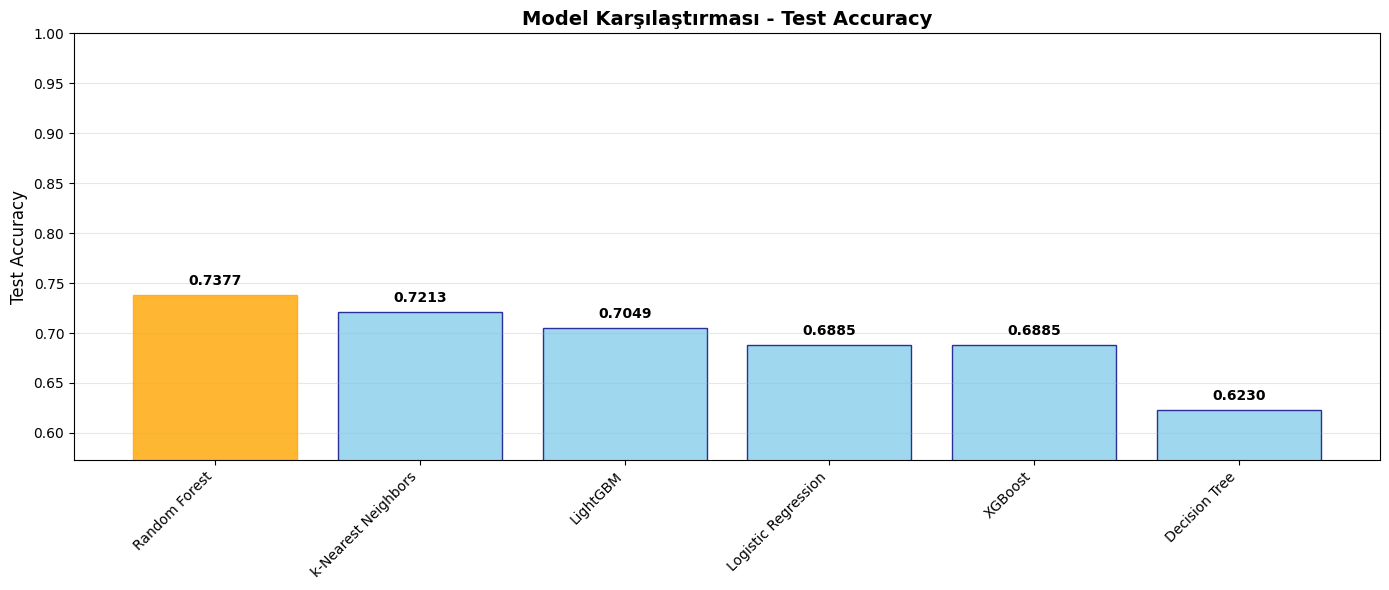

In [6]:
# Görselleştirme 1: Test Accuracy Karşılaştırması
plt.figure(figsize=(14, 6))

accuracies = results_df_sorted['test_accuracy'].values
model_names = results_df_sorted.index.tolist()

bars = plt.bar(range(len(model_names)), accuracies, color='skyblue', edgecolor='navy', alpha=0.8)

# En iyi modeli vurgula
bars[0].set_color('orange')

plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Model Karşılaştırması - Test Accuracy', fontsize=14, fontweight='bold')
plt.ylim([min(accuracies) - 0.05, 1.0])
plt.grid(axis='y', alpha=0.3)

# Değerleri yazdır
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


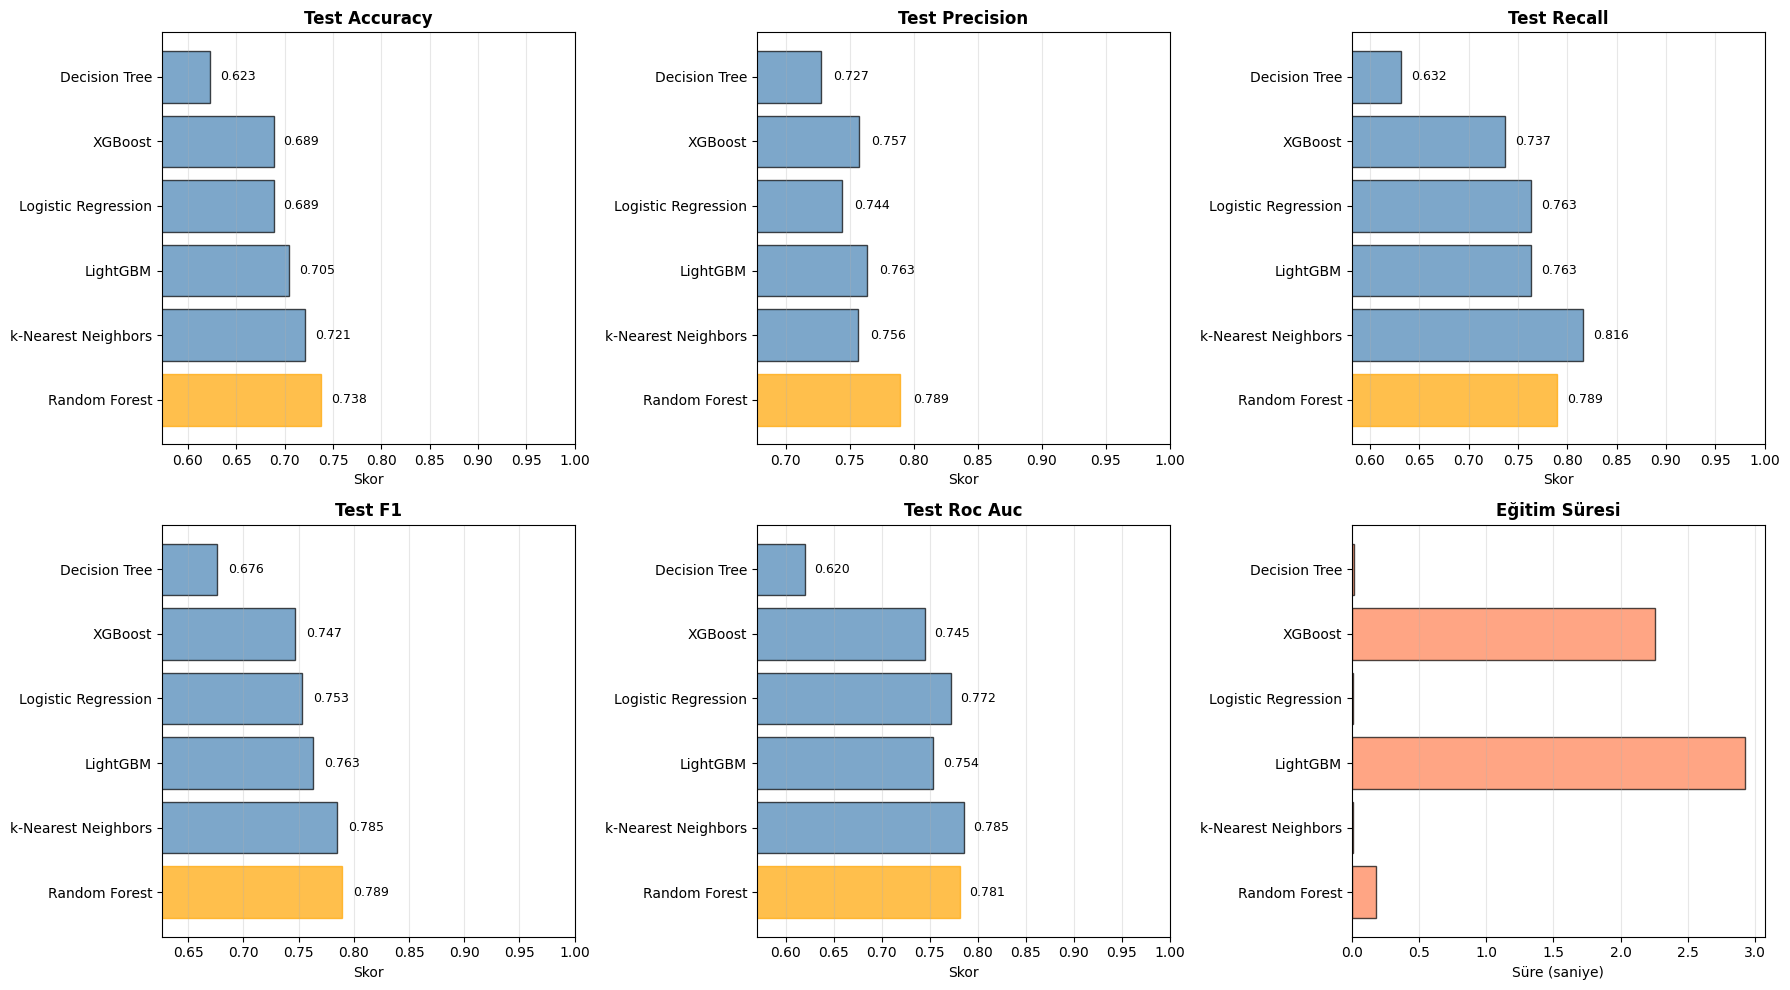

In [14]:
# Görselleştirme 2: Tüm Metriklerin Karşılaştırması
metrics_to_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, metric in enumerate(metrics_to_plot):
    metric_values = results_df_sorted[metric].values
    
    bars = axes[idx].barh(range(len(model_names)), metric_values, color='steelblue', alpha=0.7, edgecolor='black')
    bars[0].set_color('orange')
    
    axes[idx].set_yticks(range(len(model_names)))
    axes[idx].set_yticklabels(model_names)
    axes[idx].set_xlabel('Skor', fontsize=10)
    axes[idx].set_title(metric.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[idx].set_xlim([min(metric_values) - 0.05, 1.0])
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Değerleri yazdır
    for i, v in enumerate(metric_values):
        axes[idx].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

# Training time
axes[5].barh(range(len(model_names)), results_df_sorted['training_time'].values, 
             color='coral', alpha=0.7, edgecolor='black')
axes[5].set_yticks(range(len(model_names)))
axes[5].set_yticklabels(model_names)
axes[5].set_xlabel('Süre (saniye)', fontsize=10)
axes[5].set_title('Eğitim Süresi', fontsize=12, fontweight='bold')
axes[5].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


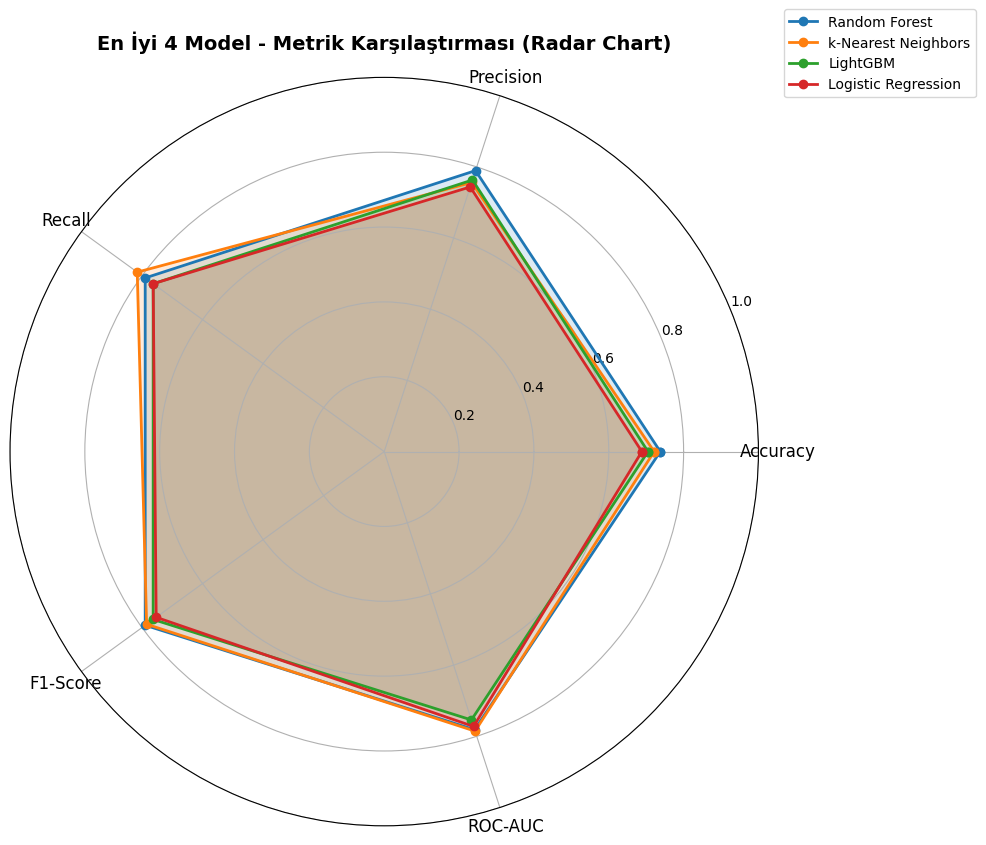

In [8]:
# Görselleştirme 3: Radar Chart (Tüm Metrikler)
from math import pi

# En iyi 4 modeli al
top_models = results_df_sorted.head(4).index.tolist()

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for model_name in top_models:
    values = [
        results_df.loc[model_name, 'test_accuracy'],
        results_df.loc[model_name, 'test_precision'],
        results_df.loc[model_name, 'test_recall'],
        results_df.loc[model_name, 'test_f1'],
        results_df.loc[model_name, 'test_roc_auc']
    ]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name)
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=10)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.title('En İyi 4 Model - Metrik Karşılaştırması (Radar Chart)', 
          size=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 5. En İyi Model Seçimi


In [9]:
# En iyi model
best_model_name = results_df_sorted.index[0]
best_model_results = results_df_sorted.iloc[0]

print("\n" + "="*60)
print("🏆 EN İYİ MODEL")
print("="*60)
print(f"\nModel: {best_model_name}")
print(f"\nPerformans Metrikleri:")
print(f"  Test Accuracy:  {best_model_results['test_accuracy']:.4f}")
print(f"  Test Precision: {best_model_results['test_precision']:.4f}")
print(f"  Test Recall:    {best_model_results['test_recall']:.4f}")
print(f"  Test F1-Score:  {best_model_results['test_f1']:.4f}")
print(f"  Test ROC-AUC:   {best_model_results['test_roc_auc']:.4f}")
print(f"  Eğitim Süresi:  {best_model_results['training_time']:.3f} saniye")
print("="*60)



🏆 EN İYİ MODEL

Model: Random Forest

Performans Metrikleri:
  Test Accuracy:  0.7377
  Test Precision: 0.7895
  Test Recall:    0.7895
  Test F1-Score:  0.7895
  Test ROC-AUC:   0.7815
  Eğitim Süresi:  0.180 saniye


In [10]:
# Model sıralaması (her metriğe göre)
print("\n📊 METRİKLERE GÖRE MODEL SIRALAMASI\n")

for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
    print(f"\n{metric.replace('_', ' ').title()}:")
    print("-" * 40)
    sorted_models = results_df.sort_values(metric, ascending=False)
    for i, (model_name, row) in enumerate(sorted_models.iterrows(), 1):
        print(f"  {i}. {model_name:<25} {row[metric]:.4f}")



📊 METRİKLERE GÖRE MODEL SIRALAMASI


Test Accuracy:
----------------------------------------
  1. Random Forest             0.7377
  2. k-Nearest Neighbors       0.7213
  3. LightGBM                  0.7049
  4. Logistic Regression       0.6885
  5. XGBoost                   0.6885
  6. Decision Tree             0.6230

Test Precision:
----------------------------------------
  1. Random Forest             0.7895
  2. LightGBM                  0.7632
  3. XGBoost                   0.7568
  4. k-Nearest Neighbors       0.7561
  5. Logistic Regression       0.7436
  6. Decision Tree             0.7273

Test Recall:
----------------------------------------
  1. k-Nearest Neighbors       0.8158
  2. Random Forest             0.7895
  3. Logistic Regression       0.7632
  4. LightGBM                  0.7632
  5. XGBoost                   0.7368
  6. Decision Tree             0.6316

Test F1:
----------------------------------------
  1. Random Forest             0.7895
  2. k-Nearest Neigh

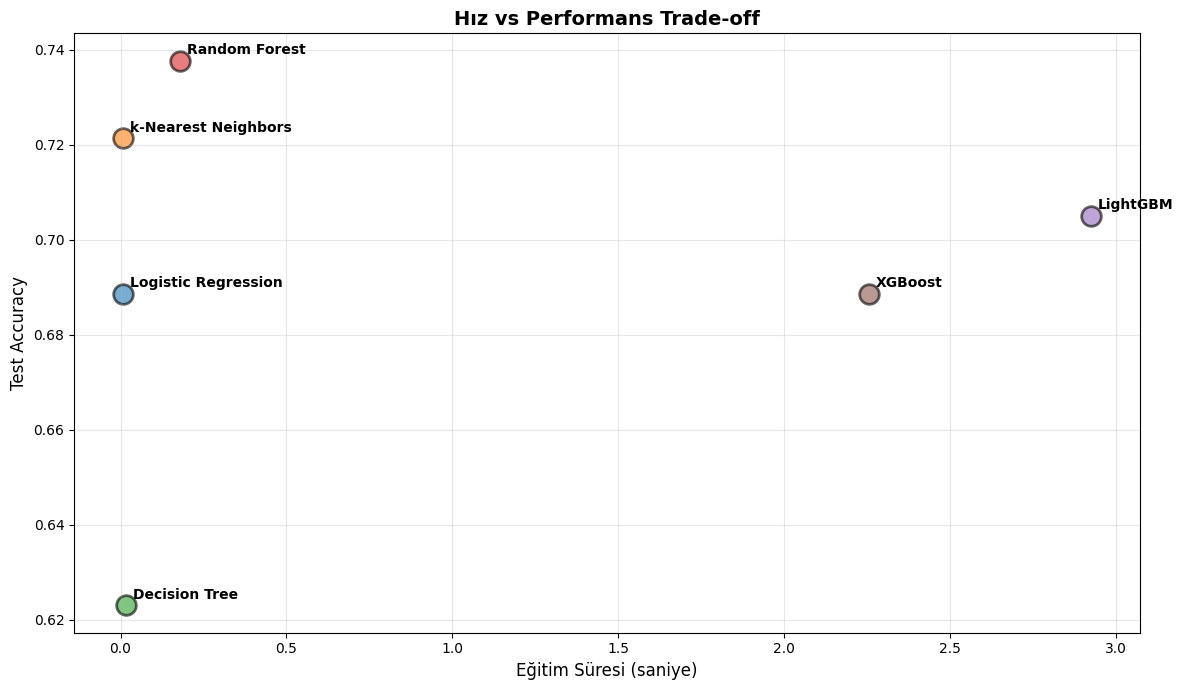


💡 İdeal model: Sağ üst köşede (yüksek accuracy, düşük eğitim süresi)


In [13]:
# Hız vs Performans Trade-off
plt.figure(figsize=(12, 7))

for model_name in results_df.index:
    plt.scatter(results_df.loc[model_name, 'training_time'],
               results_df.loc[model_name, 'test_accuracy'],
               s=200, alpha=0.6, edgecolors='black', linewidth=2)
    plt.annotate(model_name, 
                (results_df.loc[model_name, 'training_time'],
                 results_df.loc[model_name, 'test_accuracy']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.xlabel('Eğitim Süresi (saniye)', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Hız vs Performans Trade-off', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 İdeal model: Sağ üst köşede (yüksek accuracy, düşük eğitim süresi)")


## 6. Sonuçlar ve Öneriler

### 📊 Özet Bulgular:

**Performans Açısından:**
- En yüksek accuracy'ye sahip modeller genellikle ensemble yöntemlerdir (Random Forest, XGBoost, LightGBM)
- Logistic Regression basit ama etkili bir başlangıç noktasıdır
- kNN ölçeklendirmeye duyarlıdır ve iyi performans gösterir

**Hız Açısından:**
- Logistic Regression en hızlı eğitim süresine sahiptir
- Tree-based modeller (Decision Tree, Random Forest) orta hızlıdır
- Boosting algoritmaları (XGBoost, LightGBM) daha uzun eğitim süresi gerektirir

**Genel Değerlendirme:**
- Üretim ortamı için: Hız ve performans dengesini göz önünde bulundurun
- Yorumlanabilirlik gerekiyorsa: Logistic Regression veya Decision Tree
- En yüksek doğruluk gerekiyorsa: Ensemble modeller (RF, XGBoost, LightGBM)

### 🎯 Öneriler:

1. **Hiperparametre Optimizasyonu**: En iyi 2-3 modeli GridSearchCV ile optimize edin
2. **Cross-Validation**: Daha güvenilir sonuçlar için CV skorlarını inceleyin
3. **Feature Engineering**: Yeni özellikler ekleyerek performansı artırabilirsiniz
4. **Ensemble Yöntemler**: Farklı modelleri birleştirerek (voting, stacking) daha iyi sonuçlar elde edebilirsiniz
5. **Model Deployment**: En iyi modeli pickle/joblib ile kaydedin ve üretime alın

### 📈 Sonraki Adımlar:

- Seçilen modeli optimize edin
- Gerçek dünya verileriyle test edin
- Model performansını düzenli olarak izleyin
- Gerekirse modeli yeniden eğitin


In [12]:
# Sonuçları CSV olarak kaydet
results_df_sorted.to_csv('../results/model_comparison_results.csv')
print("✓ Sonuçlar '../results/model_comparison_results.csv' dosyasına kaydedildi!")

print("\n🎉 Model karşılaştırması tamamlandı!")


✓ Sonuçlar '../results/model_comparison_results.csv' dosyasına kaydedildi!

🎉 Model karşılaştırması tamamlandı!
